In [1]:


rangescale <- function(X) {

	Xmax <- apply(X, 2, max)
	Xscaled = scale(X, scale=Xmax, center=T)

	return(Xscaled)
}
library('scales')
library("ggplot2")

In [2]:
df=read.table("all_48_48_replace.arff.csv",sep=",",header=T)

size_df = dim(df)

# Change the columns
data = data.matrix(df[,2:(size_df[2]-1)])
data = rangescale(data)
pca = prcomp(data)

sum_pca = summary(pca)

# Change the label if necessary
a=df[,size_df[2]]



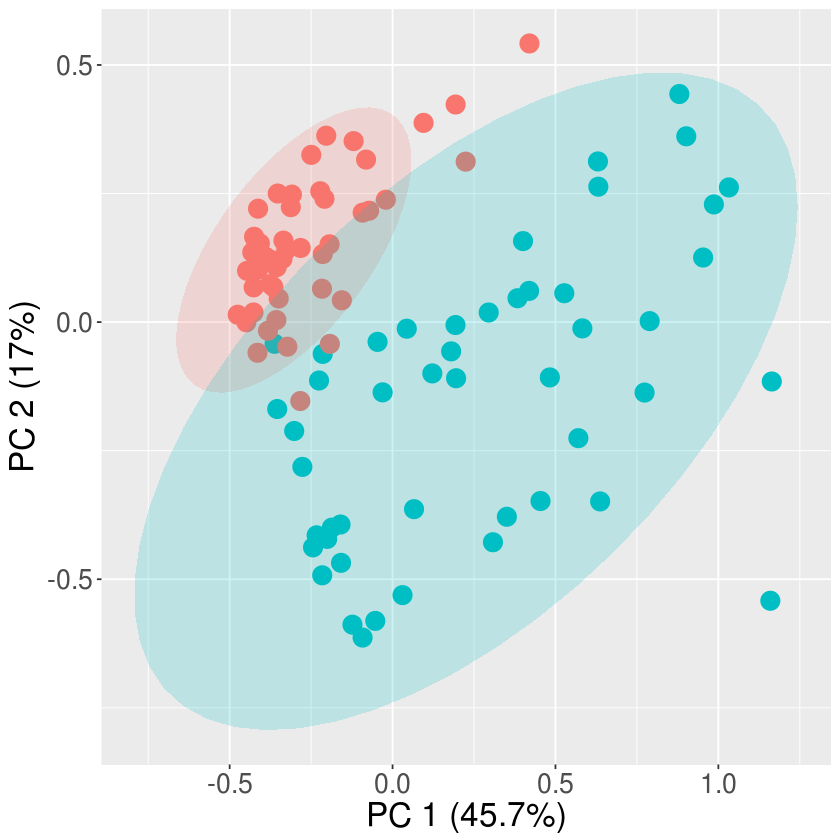

In [19]:
pc_data_frame = data.frame(pc1 = pca$x[,1],pc2 = pca$x[,2],pc3 = pca$x[,3],class=a)

ggplot(pc_data_frame) +
  # geom_point(aes(x=pc1, y=pc2, colour="black",fill="black", size=5, shape=factor(class))) +
  geom_point(aes(x=pc1, y=pc2, colour=factor(class)), size=5) +
  scale_shape(name="Class") + 
  stat_ellipse(aes(x=pc1,y=pc2,fill=factor(class)),
               geom="polygon", level=0.95, alpha=0.2)+
	xlab(paste("PC 1 (",percent(sum_pca$importance[2,1]),")",sep = ""))+ ylab(paste("PC 2 (",percent(sum_pca$importance[2,2]),")",sep = "")) + 
theme(text = element_text(size=20),legend.position="none")


In [20]:
ggsave(filename="SVM_RFE.png",dpi=600)

Saving 6.67 x 6.67 in image


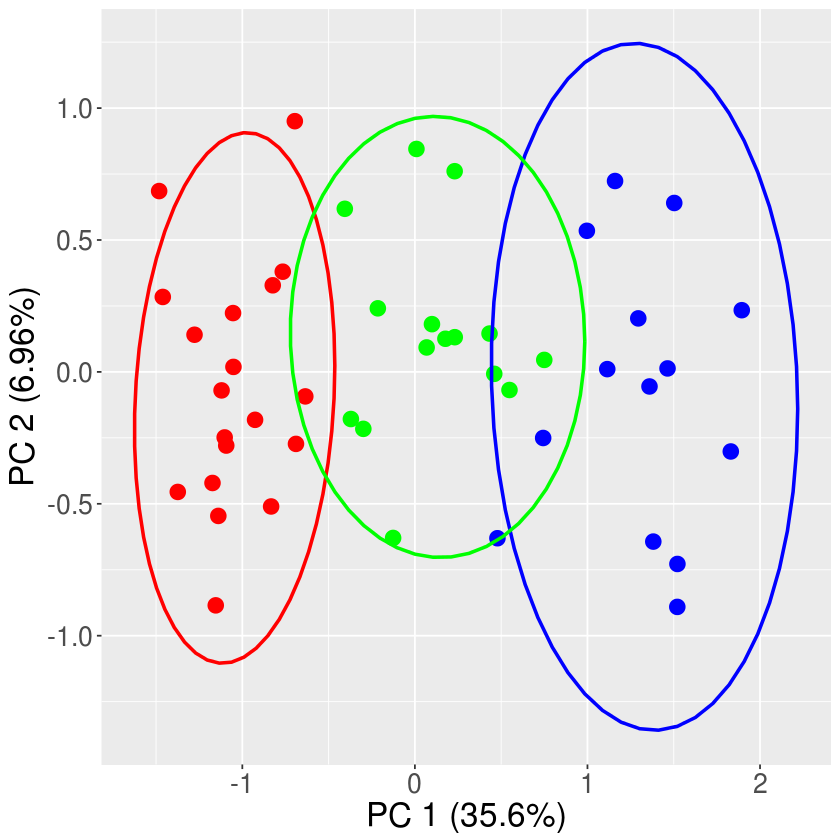

In [56]:
df=read.table("T2D_only_id_all_48_48_replace.arff.csv",sep=",",header=T)

size_df = dim(df)

# Change the columns
data = data.matrix(df[,2:(size_df[2]-3)])
data = rangescale(data)
pca = prcomp(data)

sum_pca = summary(pca)

# Change the label if necessary
a=df[,(size_df[2]-1)]


pc_data_frame = data.frame(pc1 = pca$x[,1],pc2 = -pca$x[,2],pc3 = pca$x[,3],class=a)
ggplot(pc_data_frame) +
  # geom_point(aes(x=pc1, y=pc2, colour="black",fill="black", size=5, shape=factor(class))) +
  geom_point(aes(x=pc1, y=pc2, colour=factor(class)), size=4) +
  scale_shape(name="") + 
  # scale_shape_manual("",values = c("Cluster0" = 15, "Cluster1" = 17, "Cluster2" = 19))+
  scale_colour_manual("",values = c("Cluster0" = "red", "Cluster1" = "blue", "Cluster2" = 'green'),guide = FALSE)+
  stat_ellipse(aes(x=pc1,y=pc2,colour=factor(class)),
               geom="path", level=0.95, alpha=1,size=1)+
	xlab(paste("PC 1 (",percent(sum_pca$importance[2,1]),")",sep = ""))+ ylab(paste("PC 2 (",percent(sum_pca$importance[2,2]),")",sep = ""))+
  theme(text = element_text(size=20),legend.position="none") 

In [57]:
ggsave(filename="Newly_3_clusters.png",dpi=600,width=7,height=5.6)

In [58]:
df2 = df[,2:(size_df[2]-3)]
df2$Class = df[,size_df[2]-1]

[1] Cluster1 Cluster1 Cluster2 Cluster2 Cluster1 Cluster2 Cluster0 Cluster1
 [9] Cluster2 Cluster1 Cluster2 Cluster1 Cluster2 Cluster2 Cluster1 Cluster2
[17] Cluster2 Cluster1 Cluster1 Cluster1 Cluster2 Cluster1 Cluster1 Cluster1
[25] Cluster2 Cluster2 Cluster2 Cluster0 Cluster2 Cluster0 Cluster1 Cluster0
[33] Cluster0 Cluster0 Cluster0 Cluster0 Cluster0 Cluster0 Cluster0 Cluster0
[41] Cluster0 Cluster0 Cluster0 Cluster2 Cluster0 Cluster0 Cluster0 Cluster0
Levels: Cluster0 Cluster1 Cluster2

In [59]:
colnames(df2)

[1] "Alter"                  "HbA1c"                  "Height"                
 [4] "Body_weight"            "BMI"                    "Body_fat"              
 [7] "Fat_free_mass"          "Waist"                  "Hip"                   
[10] "WHR"                    "Hamoglobin"             "Erythrozyten"          
[13] "Thrombozyten"           "Leukocytes"             "ALAT"                  
[16] "ASAT"                   "gGT"                    "Fasting_plasma_glucose"
[19] "Fasting_plasma_insulin" "C_Peptid"               "Proinsulin"            
[22] "Creatinin"              "Triglycerides"          "Cholesterol_total"     
[25] "HDL_Cholesterol"        "LDL_Cholesterol"        "Gesamteiweib"          
[28] "Albumin"                "TSH"                    "fT3"                   
[31] "fT4"                    "Cortisol"               "Testosteron"           
[34] "HOMA_IR"                "Free_fatty_acids"       "RRsys"                 
[37] "RR_dia"                 "ssCRP"                  "P_1_HSA"               
[40] "P_2_HSA"                "P_3_HSA"                "P_4_HSA"               
[43] "P_5_HSA"                "P_6_HSA"                "P_7_HSA"               
[46] "P_8_HSA"                "P_9_HSA"                "P_10_HSA"              
[49] "P_11_HSA"               "P_12_HSA"               "P_13_HSA"              
[52] "P_14_HSA"               "P_15_IGKC"              "P_16_IGKC"             
[55] "P_17_IGKC"              "P_18_FGB"               "P_21_A2M"              
[58] "P_22_A2M"               "P_23_TF"                "P_24_IGLC1"            
[61] "P_25_APOA1"             "P_26_APOA1"             "P_27_HP"               
[64] "P_29_FGA"               "P_30_FGA"               "Class"

In [62]:

a=ggplot(df2)
a=a+geom_boxplot(aes(x="Alter",y=Alter,colour=factor(Class)),alpha = I(0.5),name="Alter")
a=a+geom_boxplot(aes(x="Height",y=Height,colour=factor(Class)),alpha = I(0.5) ,name="Height")
a=a+geom_boxplot(aes(x="Body_weight",y=Body_weight,colour=factor(Class)),alpha = I(0.5) ,name="Body_weight")
a=a+geom_boxplot(aes(x="BMI",y=BMI,colour=factor(Class)),alpha = I(0.5) ,name="BMI")
a=a+geom_boxplot(aes(x="Body_fat",y=Body_fat,colour=factor(Class)),alpha = I(0.5) ,name="Body_fat")
a=a+geom_boxplot(aes(x="Fat_free_mass",y=Fat_free_mass,colour=factor(Class)),alpha = I(0.5) ,name="Fat_free_mass")
a=a+geom_boxplot(aes(x="Waist",y=Waist,colour=factor(Class)),alpha = I(0.5) ,name="Waist")
a=a+geom_boxplot(aes(x="Hip",y=Hip,colour=factor(Class)),alpha = I(0.5) ,name="Hip")
a=a+geom_boxplot(aes(x="WHR",y=WHR,colour=factor(Class)),alpha = I(0.5) ,name="WHR")
a=a+geom_boxplot(aes(x="Hamoglobin",y=Hamoglobin,colour=factor(Class)),alpha = I(0.5) ,name="Hamoglobin")
a=a+geom_boxplot(aes(x="Erythrozyten",y=Erythrozyten,colour=factor(Class)),alpha = I(0.5) ,name="Erythrozyten")
a=a+geom_boxplot(aes(x="Thrombozyten",y=Thrombozyten,colour=factor(Class)),alpha = I(0.5) ,name="Thrombozyten")
a=a+geom_boxplot(aes(x="Leukocytes",y=Leukocytes,colour=factor(Class)),alpha = I(0.5) ,name="Leukocytes")
a=a+geom_boxplot(aes(x="ALAT",y=ALAT,colour=factor(Class)),alpha = I(0.5) ,name="ALAT")
a=a+geom_boxplot(aes(x="ASAT",y=ASAT,colour=factor(Class)),alpha = I(0.5) ,name="ASAT")
a=a+geom_boxplot(aes(x="gGT",y=gGT,colour=factor(Class)),alpha = I(0.5) ,name="gGT")
a=a+geom_boxplot(aes(x="Fasting_plasma_glucose",y=Fasting_plasma_glucose,colour=factor(Class)),alpha = I(0.5) ,name="Fasting_plasma_glucose")
a=a+geom_boxplot(aes(x="Fasting_plasma_insulin",y=Fasting_plasma_insulin,colour=factor(Class)),alpha = I(0.5) ,name="Fasting_plasma_insulin")
a=a+geom_boxplot(aes(x="C_Peptid",y=C_Peptid,colour=factor(Class)),alpha = I(0.5) ,name="C_Peptid")
a=a+geom_boxplot(aes(x="Proinsulin",y=Proinsulin,colour=factor(Class)),alpha = I(0.5) ,name="Proinsulin")
a=a+geom_boxplot(aes(x="Creatinin",y=Creatinin,colour=factor(Class)),alpha = I(0.5) ,name="Creatinin")
a=a+geom_boxplot(aes(x="Triglycerides",y=Triglycerides,colour=factor(Class)),alpha = I(0.5) ,name="Triglycerides")
a=a+geom_boxplot(aes(x="Cholesterol_total",y=Cholesterol_total,colour=factor(Class)),alpha = I(0.5) ,name="Cholesterol_total")
a=a+geom_boxplot(aes(x="HDL_Cholesterol",y=HDL_Cholesterol,colour=factor(Class)),alpha = I(0.5) ,name="HDL_Cholesterol")
a=a+geom_boxplot(aes(x="LDL_Cholesterol",y=LDL_Cholesterol,colour=factor(Class)),alpha = I(0.5) ,name="LDL_Cholesterol")
a=a+geom_boxplot(aes(x="Gesamteiweib",y=Gesamteiweib,colour=factor(Class)),alpha = I(0.5) ,name="Gesamteiweib")
a=a+geom_boxplot(aes(x="Albumin",y=Albumin,colour=factor(Class)),alpha = I(0.5) ,name="Albumin")
a=a+geom_boxplot(aes(x="HbA1c",y=HbA1c,colour=factor(Class)),alpha = I(0.5) ,name="HbA1c")
a=a+geom_boxplot(aes(x="TSH",y=TSH,colour=factor(Class)),alpha = I(0.5) ,name="TSH")
a=a+geom_boxplot(aes(x="fT3",y=fT3,colour=factor(Class)),alpha = I(0.5) ,name="fT3")
a=a+geom_boxplot(aes(x="fT4",y=fT4,colour=factor(Class)),alpha = I(0.5) ,name="fT4")
a=a+geom_boxplot(aes(x="Cortisol",y=Cortisol,colour=factor(Class)),alpha = I(0.5) ,name="Cortisol")
a=a+geom_boxplot(aes(x="Testosteron",y=Testosteron,colour=factor(Class)),alpha = I(0.5) ,name="Testosteron")
a=a+geom_boxplot(aes(x="HOMA_IR",y=HOMA_IR,colour=factor(Class)),alpha = I(0.5) ,name="HOMA_IR")
a=a+geom_boxplot(aes(x="Free_fatty_acids",y=Free_fatty_acids,colour=factor(Class)),alpha = I(0.5) ,name="Free_fatty_acids")
a=a+geom_boxplot(aes(x="RRsys",y=RRsys,colour=factor(Class)),alpha = I(0.5) ,name="RRsys")
a=a+geom_boxplot(aes(x="RR_dia",y=RR_dia,colour=factor(Class)),alpha = I(0.5) ,name="RR_dia")
a=a+geom_boxplot(aes(x="ssCRP",y=ssCRP,colour=factor(Class)),alpha = I(0.5) ,name="ssCRP")
a=a+geom_boxplot(aes(x="P_27_HP",y=P_27_HP,colour=factor(Class)),alpha = I(0.5) ,name="P_27_HP")
a=a+geom_boxplot(aes(x="P_8_HSA",y=P_8_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_8_HSA")
a=a+geom_boxplot(aes(x="P_11_HSA",y=P_11_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_11_HSA")
a=a+geom_boxplot(aes(x="P_22_A2M",y=P_22_A2M,colour=factor(Class)),alpha = I(0.5) ,name="P_22_A2M")
a=a+geom_boxplot(aes(x="P_18_FGB",y=P_18_FGB,colour=factor(Class)),alpha = I(0.5) ,name="P_18_FGB")
a=a+geom_boxplot(aes(x="P_26_APOA1",y=P_26_APOA1,colour=factor(Class)),alpha = I(0.5) ,name="P_26_APOA1")
a=a+geom_boxplot(aes(x="P_24_IGLC1",y=P_24_IGLC1,colour=factor(Class)),alpha = I(0.5) ,name="P_24_IGLC1")
a=a+geom_boxplot(aes(x="P_30_FGA",y=P_30_FGA,colour=factor(Class)),alpha = I(0.5) ,name="P_30_FGA")
a=a+geom_boxplot(aes(x="P_3_HSA",y=P_3_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_3_HSA")
a=a+geom_boxplot(aes(x="P_16_IGKC",y=P_16_IGKC,colour=factor(Class)),alpha = I(0.5) ,name="P_16_IGKC")
a=a+geom_boxplot(aes(x="P_6_HSA",y=P_6_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_6_HSA")
a=a+geom_boxplot(aes(x="P_25_APOA1",y=P_25_APOA1,colour=factor(Class)),alpha = I(0.5) ,name="P_25_APOA1")
a=a+geom_boxplot(aes(x="P_1_HSA",y=P_1_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_1_HSA")
a=a+geom_boxplot(aes(x="P_4_HSA",y=P_4_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_4_HSA")
a=a+geom_boxplot(aes(x="P_23_TF",y=P_23_TF,colour=factor(Class)),alpha = I(0.5) ,name="P_23_TF")
a=a+geom_boxplot(aes(x="P_9_HSA",y=P_9_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_9_HSA")
a=a+geom_boxplot(aes(x="P_29_FGA",y=P_29_FGA,colour=factor(Class)),alpha = I(0.5) ,name="P_29_FGA")
a=a+geom_boxplot(aes(x="P_13_HSA",y=P_13_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_13_HSA")
a=a+geom_boxplot(aes(x="P_15_IGKC",y=P_15_IGKC,colour=factor(Class)),alpha = I(0.5) ,name="P_15_IGKC")
a=a+geom_boxplot(aes(x="P_5_HSA",y=P_5_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_5_HSA")
a=a+geom_boxplot(aes(x="P_12_HSA",y=P_12_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_12_HSA")
a=a+geom_boxplot(aes(x="P_10_HSA",y=P_10_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_10_HSA")
a=a+geom_boxplot(aes(x="P_14_HSA",y=P_14_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_14_HSA")
a=a+geom_boxplot(aes(x="P_17_IGKC",y=P_17_IGKC,colour=factor(Class)),alpha = I(0.5) ,name="P_17_IGKC")
a=a+geom_boxplot(aes(x="P_2_HSA",y=P_2_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_2_HSA")
a=a+geom_boxplot(aes(x="P_21_A2M",y=P_21_A2M,colour=factor(Class)),alpha = I(0.5) ,name="P_21_A2M")
a=a+geom_boxplot(aes(x="P_7_HSA",y=P_7_HSA,colour=factor(Class)),alpha = I(0.5) ,name="P_7_HSA")

a=a+ylab("Normalized Feature Values")
# a=a+scale_color_manual("",values = c("cluster0" = "red", "cluster1" = "green","cluster2" = "blue"))
a=a+scale_colour_manual("",values = c("Cluster0" = "red", "Cluster2" = 'green', "Cluster1" = "blue"),guide = FALSE)


a=a+theme(axis.text.x = element_text(size = 8, angle = 90, hjust=1.0,vjust=0.5))
ggsave(filename="boxplot.png",a,dpi=600,width=10,height=4)

Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning message:
“Ignoring unknown parameters: name”Warning mess

Saving 6.67 x 6.67 in image


ERROR: Error in FUN(X[[i]], ...): object 'C_Peptid' not found


In [44]:
?ggsave